In [1]:
%load_ext autoreload
%autoreload 2

from spear.assets import Asset
from spear.events import Action, Event
from spear.flows import Expense, TaxableIncome
from spear.model import FinancialModel

In [19]:
salary = TaxableIncome(name="Salary", initial_value=310_000, state="MA")
housing = Expense(name="Housing", initial_value=40_000, inflation_rate=0.02)
cost_of_living = Expense(name="Cost of Living", initial_value=50_000, inflation_rate=0.03)
health_insurance = Expense(name="Health Insurance", initial_value=0, inflation_rate=0.03)

cash = Asset(name="Cash", initial_value=20_000, growth_rate=0.01, cap_value=50_000)
bonds = Asset(name="Bonds", initial_value=50_000, growth_rate=0.03, allocation=0.1)
stocks = Asset(
    name="Stocks",
    initial_value=300_000,
    growth_rate=0.08,
    allocation=0.9,
    monte_carlo=True,
    seed=42,
)
_401k = Asset(
    name="401k",
    initial_value=250_000,
    growth_rate=0.08,
    cap_deposit=40_000,
    pretax=True,
    monte_carlo=True,
    seed=42,
)

In [ ]:
# Salary goes to 0
# Health insurance increases by 3000/person per year (2200/year in tax penalties for not having insurance, 400/yr in annual physical and tests, 600 buffer)
quit_job = Event(
    name="Quit Job",
    year=2030,
    actions=[
        Action(
            target=salary,
            action="update_base_value",
            params={"base_value": 0, "duration": 100},
        ),
        Action(
            target=health_insurance,
            action="update_base_value",
            params={"base_value": 6_000, "duration": 100},
        ),
    ],
)

In [20]:
planner = FinancialModel(
    revenues=[salary],
    expenses=[housing, cost_of_living, health_insurance],
    assets=[cash, bonds, stocks, _401k],
    events=[quit_job],
    duration=30,
    # enable_logging=True,
)
planner.run()

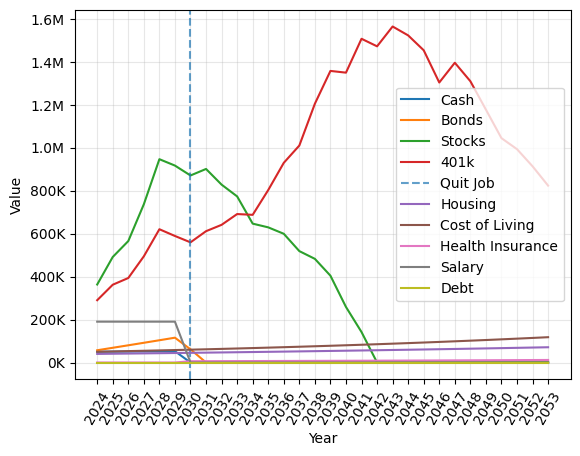

In [21]:
ax = planner.plot_all();